In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# Load the data
path = "air_quality.csv"
df = pd.read_csv(path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

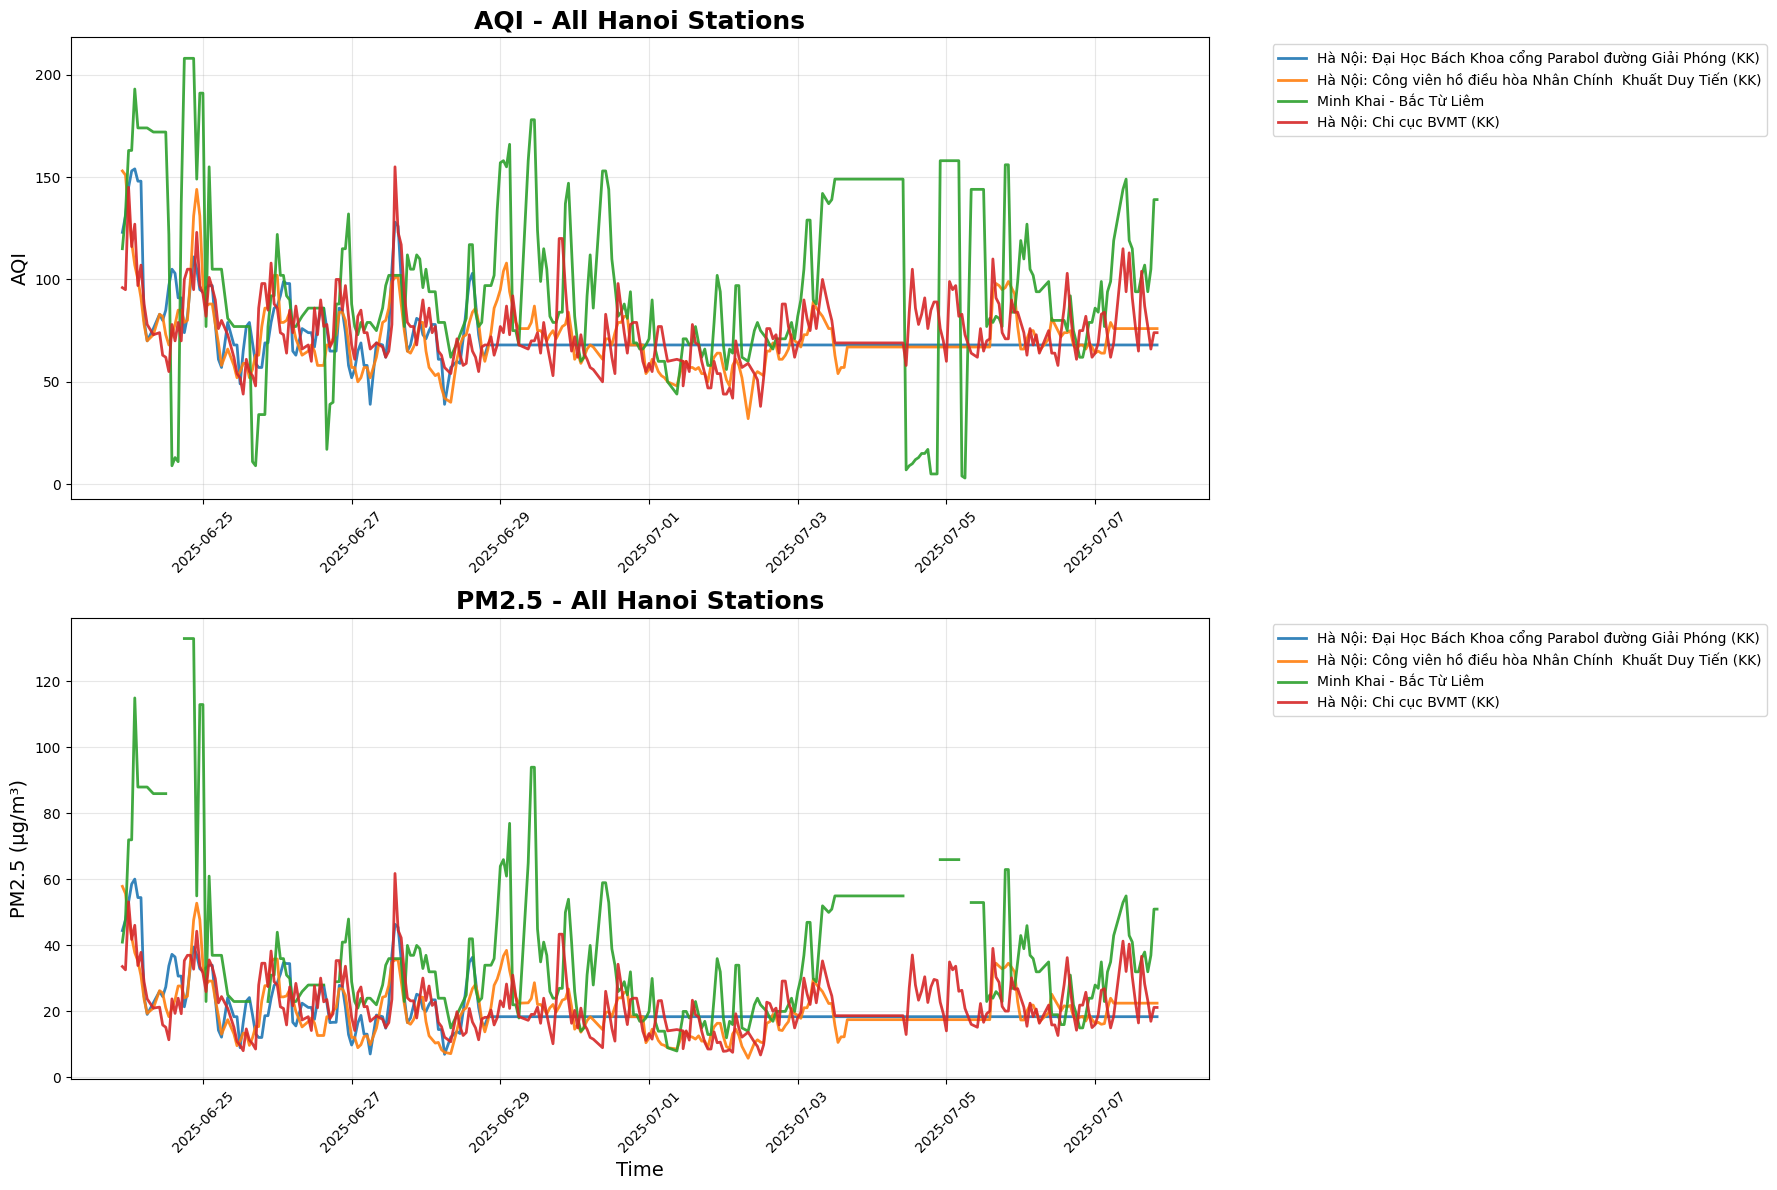

In [4]:
hanoi_stations = [
    'Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK)',
    'Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK)',
    'Minh Khai - Bắc Từ Liêm',
    'Hà Nội: Chi cục BVMT (KK)',
]

# Filter and concatenate data
hanoi_df_list = []

for station in hanoi_stations:
    station_data = df[df['station_name'] == station].copy()
    if len(station_data) > 0:
        station_recent = station_data.sort_values('timestamp').tail(307)
        hanoi_df_list.append(station_recent)

hanoi_df = pd.concat(hanoi_df_list, ignore_index=True)
hanoi_df = hanoi_df.sort_values('timestamp')


def plot_hanoi_time_series():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Define colors for each station

    # AQI Plot
    for i, station in enumerate(hanoi_stations):
        station_data = hanoi_df[hanoi_df['station_name'] == station]

        ax1.plot(
            station_data['timestamp'],
            station_data['aqi'],
            label=station,
            color=colors[i],
            linewidth=2,
            alpha=0.9
        )

    ax1.set_title('AQI - All Hanoi Stations', fontsize=18, fontweight='bold')
    ax1.set_ylabel('AQI', fontsize=14)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # PM2.5 Plot
    for i, station in enumerate(hanoi_stations):
        station_data = hanoi_df[hanoi_df['station_name'] == station]

        ax2.plot(
            station_data['timestamp'],
            station_data['PM2.5 (µg/m³)'],
            label=station,
            color=colors[i],
            linewidth=2,
            alpha=0.9
        )

    ax2.set_title('PM2.5 - All Hanoi Stations', fontsize=18, fontweight='bold')
    ax2.set_xlabel('Time', fontsize=14)
    ax2.set_ylabel('PM2.5 (µg/m³)', fontsize=14)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_hanoi_time_series()
